In [2]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, spearmanr, ttest_ind

In [3]:
# Load the Excel file
df = pd.read_excel("data.xlsx", sheet_name="Sheet1")

# Clean and simplify column names
df.columns = df.columns.str.strip().str.replace(" ", "").str.replace("(", "").str.replace(")", "")

# Rename columns for better readability
df = df.rename(columns={
    'LectureHoursh': 'LectureHours',
    'TotalPick-ups': 'TotalPickups',
    'SocialMediaPick-ups': 'SocialMediaPickups',
    'CommunicationPick-ups': 'CommunicationPickups',
    'TotalScreenTimemin': 'TotalScreenTime',
    'SleepDurationmin': 'SleepDuration',
    'CaffeineIntakemg': 'CaffeineIntake',
    'Gym1=Yes,0=No': 'Gym',
    'Temperature°C': 'Temperature'
})

# Drop rows with any missing values
df = df.dropna()
print(f"Dataset cleaned. Remaining rows: {df.shape[0]}")

# Preview the cleaned dataset
df.head()

Dataset cleaned. Remaining rows: 65


,Date,Day,LectureHours,TotalPickups,SocialMediaPickups,CommunicationPickups,TotalScreenTime,SleepDuration,CaffeineIntake,Gym,Temperature,Condition,IsExamDay,IsWeekend,IsHighCaffeineDay
0,2025-02-17,Monday,3,174.0,36.0,21.0,416.0,571.0,300.0,1.0,5.3,Rainy,0.0,0.0,0.0
1,2025-02-18,Tuesday,5,246.0,41.0,29.0,440.0,496.0,300.0,1.0,5.4,Rainy,0.0,0.0,0.0
2,2025-02-19,Wednesday,4,190.0,47.0,18.0,530.0,500.0,500.0,1.0,4.3,Rain mixed with snow,0.0,0.0,1.0
3,2025-02-20,Thursday,5,215.0,67.0,30.0,477.0,660.0,350.0,0.0,0.6,Snowy,0.0,0.0,0.0
4,2025-02-21,Friday,5,229.0,53.0,25.0,416.0,369.0,0.0,0.0,-0.1,Snowy,0.0,0.0,0.0


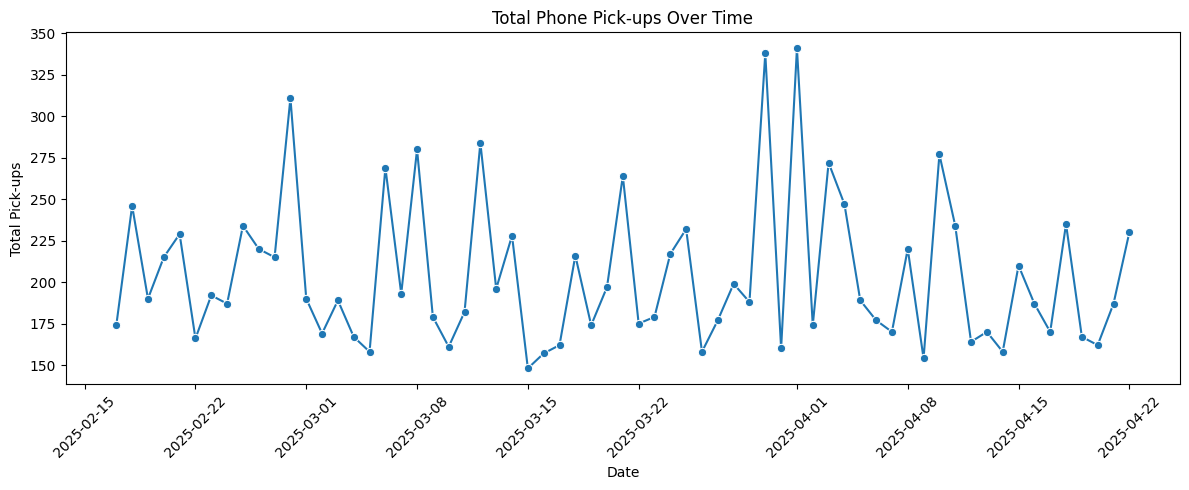

In [4]:
# Set date as index if not already
df_sorted = df.sort_values('Date')

# Plotting
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_sorted, x='Date', y='TotalPickups', marker='o')
plt.title('Total Phone Pick-ups Over Time')
plt.xlabel('Date')
plt.ylabel('Total Pick-ups')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

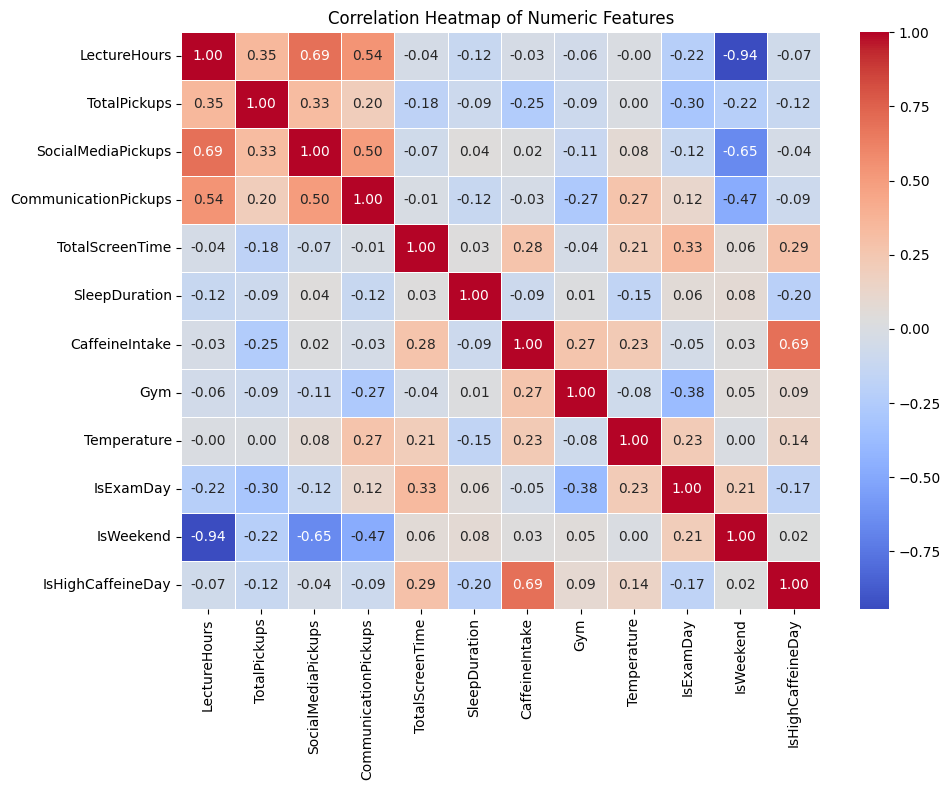

In [5]:
# Select numeric columns only
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Compute correlation matrix
corr_matrix = df[numeric_cols].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numeric Features")
plt.tight_layout()
plt.show()

The heatmap shows how different factors relate to each other. Lecture hours seem to go hand in hand with social media and communication pick-ups, which fits my expectation. Other variables like sleep or caffeine don’t show much of a pattern.

→ LectureHours shows strong positive correlation with:

	•	SocialMediaPickups (0.69)
	•	CommunicationPickups (0.54)

→ Less academic work and less phone usage on weekends.

	•	IsExamDay has a negative correlation with TotalPickups (-0.24)
→ Less distractions during exams.

→ CaffeineIntake and SleepDuration show weak or no clear relationship with pick-up behavior.

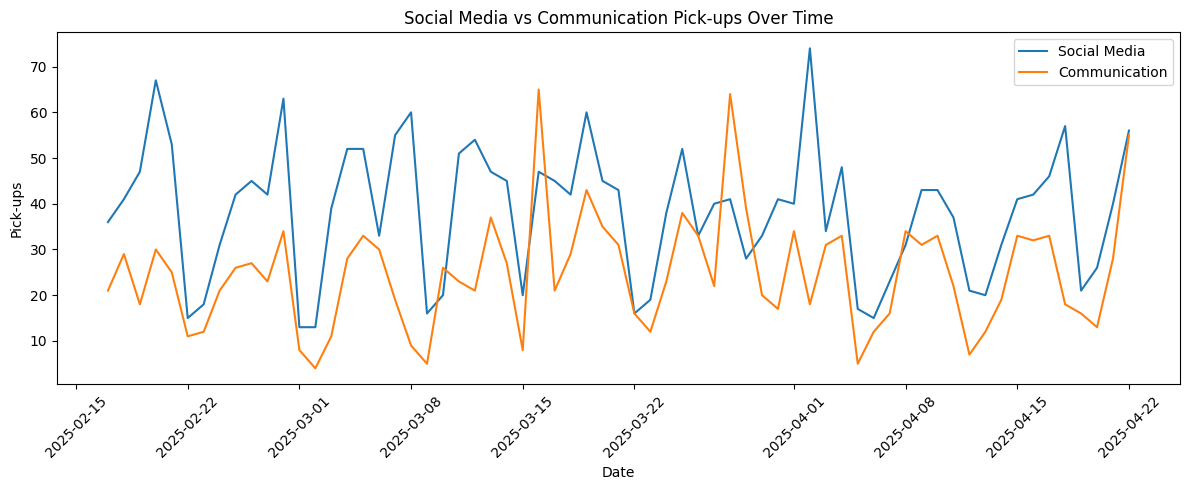

In [6]:
# Plot both social media and communication pickups over time
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_sorted, x='Date', y='SocialMediaPickups', label='Social Media')
sns.lineplot(data=df_sorted, x='Date', y='CommunicationPickups', label='Communication')
plt.title('Social Media vs Communication Pick-ups Over Time')
plt.xlabel('Date')
plt.ylabel('Pick-ups')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

This line chart tracks how my phone pick-up behavior changed over time. There are some noticeable spikes and dips, which might reflect busy academic days or periods when I was more focused.

	•	Social media pick-ups (blue line) are consistently higher than communication pick-ups (orange line), indicating a stronger habit of passive app usage.
	•	Both lines show similar fluctuations, but social media has more pronounced spikes, especially during breaks or weekends.
	•	Sudden drops in both categories may correspond to intense academic days or exam periods, possibly suggesting higher focus.

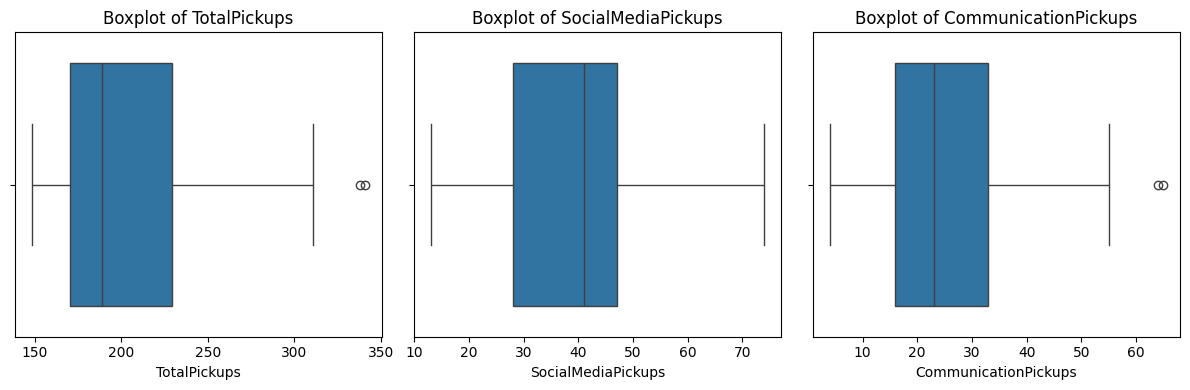

In [7]:
# List of pickup-related features
pickup_cols = ['TotalPickups', 'SocialMediaPickups', 'CommunicationPickups']

# Boxplots for pick-up related features
plt.figure(figsize=(12, 4))
for i, col in enumerate(pickup_cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
plt.xlabel(col)
plt.tight_layout()
plt.show()

The boxplots make it clear that some days are way more intense in terms of phone usage. Especially for total and social media pick-ups, there are some big outliers that might be worth a closer look.

	•	TotalPickups shows several days with significantly higher values than the rest, suggesting unusually high phone usage on those days.
	•	SocialMediaPickups displays a wider spread and higher maximums compared to communication pick-ups, indicating a more variable user behavior toward social media apps.
	•	CommunicationPickups appears relatively more consistent, with fewer and less extreme outliers.

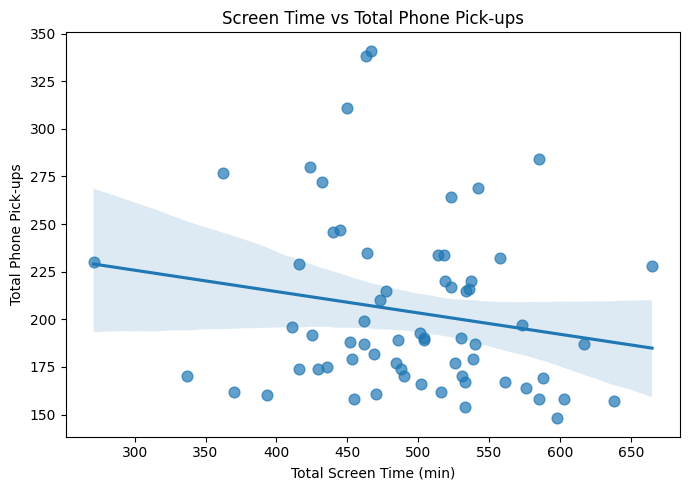

Pearson Correlation (Screen Time vs Total Pick-ups): -0.180


In [8]:
# Scatter plot: Screen Time vs Total Pickups
plt.figure(figsize=(7, 5))
sns.regplot(x='TotalScreenTime', y='TotalPickups', data=df, scatter_kws={'s': 60, 'alpha': 0.7})
plt.title('Screen Time vs Total Phone Pick-ups')
plt.xlabel('Total Screen Time (min)')
plt.ylabel('Total Phone Pick-ups')
plt.tight_layout()
plt.show()

# Correlation
from scipy.stats import pearsonr
screen_corr, _ = pearsonr(df['TotalScreenTime'], df['TotalPickups'])
print(f"Pearson Correlation (Screen Time vs Total Pick-ups): {screen_corr:.3f}")

I expected screen time and pick-ups to go hand in hand, but the correlation turned out to be weak. Looks like I either scroll long once or check often for short bursts.

	•	The Pearson correlation is weak and slightly negative (r = -0.180), suggesting that screen time is not a direct proxy for how often the phone is picked up.
	•	This could imply that some users may unlock their phone fewer times but use it for longer sessions, or vice versa.

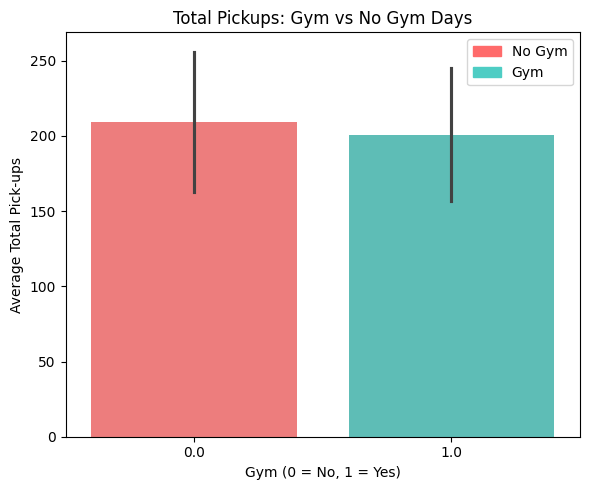

Gym vs No-Gym T-Test: t-stat = -0.72, p-value = 0.4763


In [9]:
import matplotlib.patches as mpatches
from scipy.stats import ttest_ind

# Hue etiketi
df['GymLabel'] = df['Gym'].map({0: 'No Gym', 1: 'Gym'})

# Barplot
plt.figure(figsize=(6, 5))
sns.barplot(data=df, x='Gym', y='TotalPickups', hue='GymLabel',
            estimator=np.mean, errorbar='sd',
            palette={"No Gym": "#FF6B6B", "Gym": "#4ECDC4"},
            legend=False)
plt.title('Total Pickups: Gym vs No Gym Days')
plt.xlabel('Gym (0 = No, 1 = Yes)')
plt.ylabel('Average Total Pick-ups')

# Legend
legend_labels = [
    mpatches.Patch(color="#FF6B6B", label='No Gym'),
    mpatches.Patch(color="#4ECDC4", label='Gym')
]
plt.legend(handles=legend_labels)
plt.tight_layout()
plt.show()

# T-test only as print
t_gym, p_gym = ttest_ind(df[df['Gym'] == 1]['TotalPickups'],
                         df[df['Gym'] == 0]['TotalPickups'],
                         equal_var=False)
print(f"Gym vs No-Gym T-Test: t-stat = {t_gym:.2f}, p-value = {p_gym:.4f}")

	•    Gym days seem to come with a tiny drop in phone usage, but the stats say it’s not a meaningful difference.
	•	The t-test result (p = 0.4763) confirms that gym attendance has no meaningful effect on overall phone pick-up behavior in this dataset.
	•	Error bars are wide and overlapping, further supporting the lack of a clear difference.

Even though I expected gym days to lower my phone usage a bit, the stats say there’s no real difference. I probably still use my phone the same way regardless.

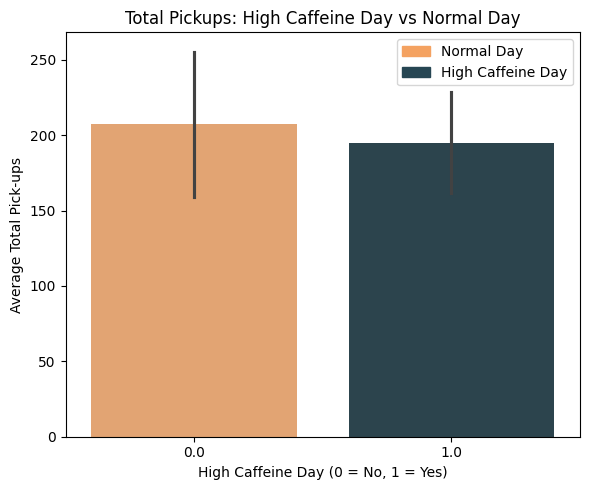

High Caffeine vs Normal Day T-Test: t-stat = -1.13, p-value = 0.2662


In [10]:
df['CaffeineLabel'] = df['IsHighCaffeineDay'].map({0: 'Normal Day', 1: 'High Caffeine Day'})

# Barplot
plt.figure(figsize=(6, 5))
sns.barplot(data=df, x='IsHighCaffeineDay', y='TotalPickups', hue='CaffeineLabel',
            estimator=np.mean, errorbar='sd',
            palette={"Normal Day": "#F4A261", "High Caffeine Day": "#264653"},
            legend=False)
plt.title('Total Pickups: High Caffeine Day vs Normal Day')
plt.xlabel('High Caffeine Day (0 = No, 1 = Yes)')
plt.ylabel('Average Total Pick-ups')

# Legend
legend_labels = [
    mpatches.Patch(color="#F4A261", label='Normal Day'),
    mpatches.Patch(color="#264653", label='High Caffeine Day')
]
plt.legend(handles=legend_labels)
plt.tight_layout()
plt.show()

# T-test only as print
t_caff, p_caff = ttest_ind(df[df['IsHighCaffeineDay'] == 1]['TotalPickups'],
                           df[df['IsHighCaffeineDay'] == 0]['TotalPickups'],
                           equal_var=False)
print(f"High Caffeine vs Normal Day T-Test: t-stat = {t_caff:.2f}, p-value = {p_caff:.4f}")

	•	The average total pick-ups are slightly lower on high caffeine days, but the difference is not statistically significant.
	•	The t-test result (p = 0.2662) suggests that caffeine intake does not meaningfully affect overall phone usage in this dataset.
	•	Error bars heavily overlap, supporting this conclusion.

Caffeine didn’t seem to make a meaningful difference in how often I picked up my phone. So either it doesn’t affect my habits much, or I drink it out of habit more than need.

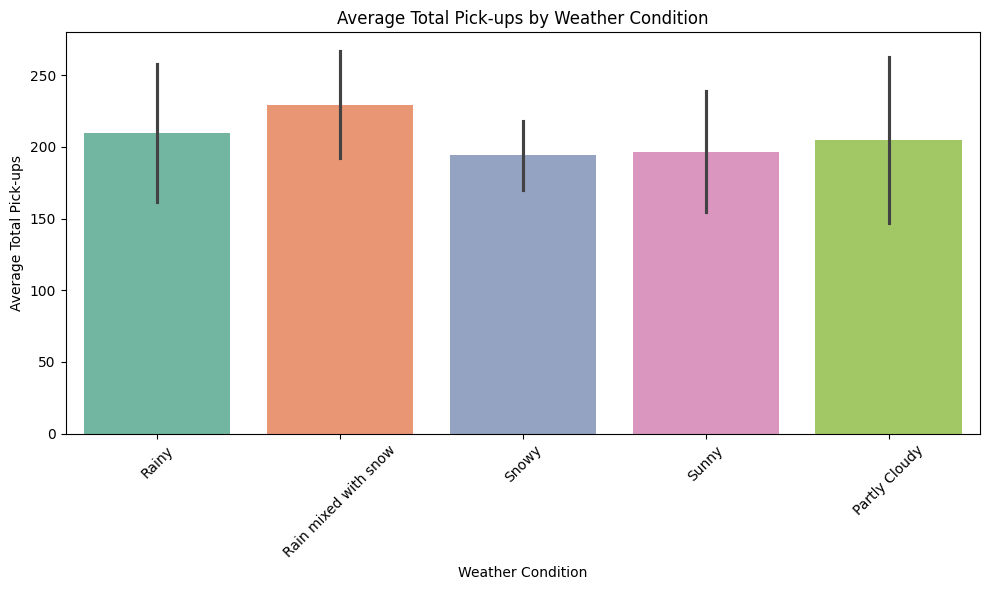

In [11]:
# Plot without palette warning by setting hue to x-axis and disabling legend
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Condition', y='TotalPickups', hue='Condition',
            estimator=np.mean, errorbar='sd', palette='Set2', legend=False)
plt.title('Average Total Pick-ups by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Average Total Pick-ups')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

	•	Although there are small variations across weather conditions, overall phone pick-up behavior remains fairly consistent.
	•	The highest average pick-ups occur on ‘Rain mixed with snow’ days, and the lowest on ‘Snowy’ days.
	•	However, the error bars (standard deviation) for all conditions are large and overlap significantly.

In [12]:
from scipy.stats import f_oneway

# Take groups
groups = [group['TotalPickups'].values for name, group in df.groupby('Condition')]

# ANOVA testing
f_stat, p_val = f_oneway(*groups)
print(f"ANOVA F-statistic: {f_stat:.3f}, p-value: {p_val:.4f}")

ANOVA F-statistic: 0.546, p-value: 0.7026


Weather conditions didn’t make much of a difference in my phone use. Even though I expected to use my phone more on rainy or snowy days, the stats say otherwise.

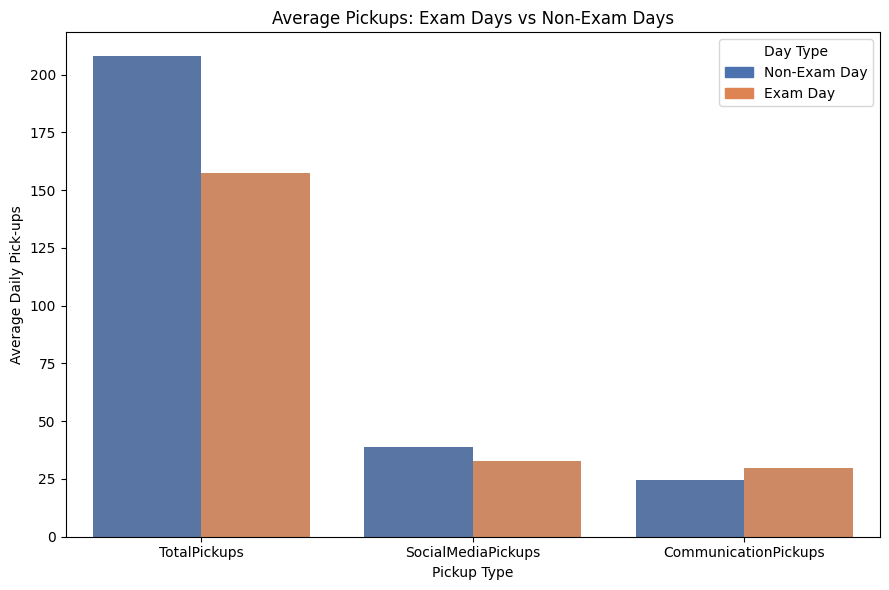

In [13]:
import matplotlib.patches as mpatches

# Group and melt (same as before)
exam_comparison = df[['IsExamDay', 'TotalPickups', 'SocialMediaPickups', 'CommunicationPickups']]
exam_melted = exam_comparison.melt(
    id_vars='IsExamDay',
    value_vars=['TotalPickups', 'SocialMediaPickups', 'CommunicationPickups'],
    var_name='PickupType',
    value_name='Count'
)

# Define colors
colors = ["#4C72B0", "#DD8452"]  # Blue = Non-Exam, Orange = Exam

# Plot
plt.figure(figsize=(9, 6))
sns.barplot(data=exam_melted, x='PickupType', y='Count', hue='IsExamDay',
            estimator=np.mean, errorbar=None, palette=colors)

plt.title('Average Pickups: Exam Days vs Non-Exam Days')
plt.xlabel('Pickup Type')
plt.ylabel('Average Daily Pick-ups')

# Custom legend with only colored boxes
custom_legend = [
    mpatches.Patch(color=colors[0], label='Non-Exam Day'),
    mpatches.Patch(color=colors[1], label='Exam Day')
]
plt.legend(handles=custom_legend, title='Day Type')

plt.tight_layout()
plt.show()

	•	Total phone pick-ups are clearly lower on exam days compared to regular days, suggesting reduced phone activity, likely due to focus or exam anxiety.
	•	Social media usage also drops on exam days, supporting the idea that students avoid distractions.
	•	Interestingly, communication pick-ups slightly increase, possibly due to coordination with classmates or asking questions before the exam.

The results show that I tend to use my phone a lot less on exam days. It makes sense, since I probably tried to avoid distractions while studying or during the exams themselves.

# **HYPTOHESIS TESTING**

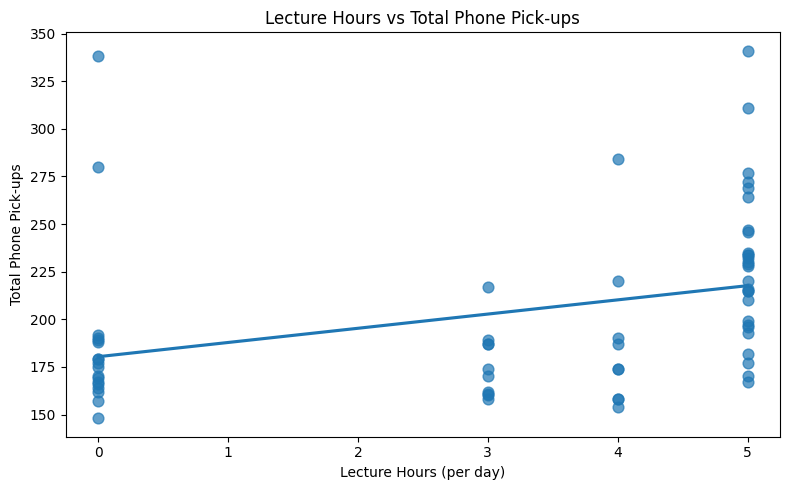

Pearson Correlation: 0.348
Spearman Correlation: 0.532


In [14]:
# Scatter plot with regression line between Lecture Hours and Total Pickups
plt.figure(figsize=(8, 5))
sns.regplot(x='LectureHours', y='TotalPickups', data=df, ci=None,
            scatter_kws={'s': 60, 'alpha': 0.7})
plt.title('Lecture Hours vs Total Phone Pick-ups')
plt.xlabel('Lecture Hours (per day)')
plt.ylabel('Total Phone Pick-ups')
plt.tight_layout()
plt.show()

# Calculate Pearson and Spearman correlation coefficients
pearson_corr, _ = pearsonr(df['LectureHours'], df['TotalPickups'])
spearman_corr, _ = spearmanr(df['LectureHours'], df['TotalPickups'])

print(f"Pearson Correlation: {pearson_corr:.3f}")
print(f"Spearman Correlation: {spearman_corr:.3f}")

The scatter plot and correlation analysis show a moderate positive relationship between the number of lecture hours and the total number of phone pick-ups.

	•	Pearson Correlation: Linear relationship → 0.348
	•	Spearman Correlation: Monotonic trend → 0.532

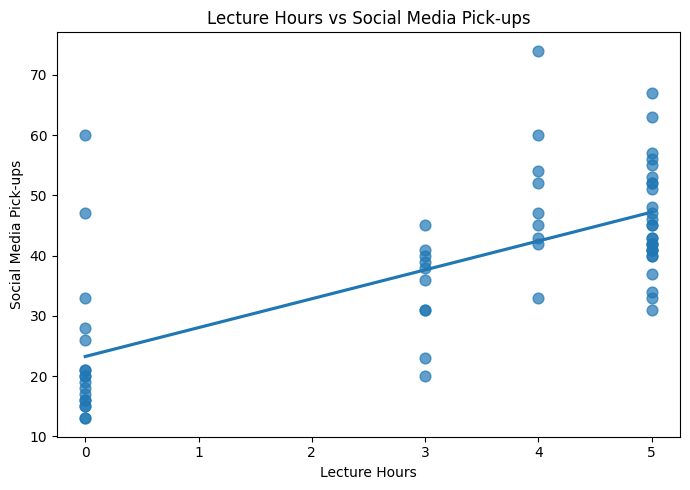

Pearson Correlation with Social Media Pick-ups: 0.692


In [15]:
# Scatter plot: Lecture Hours vs Social Media Pick-ups
plt.figure(figsize=(7, 5))
sns.regplot(x='LectureHours', y='SocialMediaPickups', data=df, ci=None,
            scatter_kws={'s': 60, 'alpha': 0.7})
plt.title('Lecture Hours vs Social Media Pick-ups')
plt.xlabel('Lecture Hours')
plt.ylabel('Social Media Pick-ups')
plt.tight_layout()
plt.show()

# Pearson correlation
social_corr, _ = pearsonr(df['LectureHours'], df['SocialMediaPickups'])
print(f"Pearson Correlation with Social Media Pick-ups: {social_corr:.3f}")

This scatter plot shows a positive relationship between lecture hours and social media pick-ups.
As lecture hours increase, students may turn to social media for short breaks or stress relief.

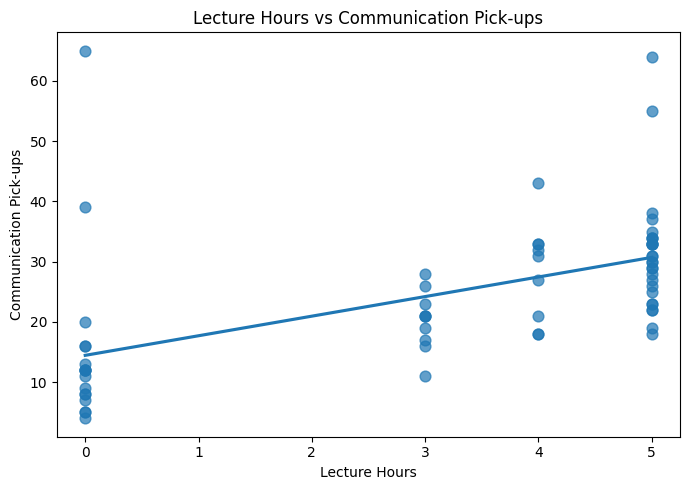

Pearson Correlation with Communication Pick-ups: 0.542


In [16]:
# Scatter plot: Lecture Hours vs Communication Pick-ups
plt.figure(figsize=(7, 5))
sns.regplot(x='LectureHours', y='CommunicationPickups', data=df, ci=None,
            scatter_kws={'s': 60, 'alpha': 0.7})
plt.title('Lecture Hours vs Communication Pick-ups')
plt.xlabel('Lecture Hours')
plt.ylabel('Communication Pick-ups')
plt.tight_layout()
plt.show()

# Pearson correlation
comm_corr, _ = pearsonr(df['LectureHours'], df['CommunicationPickups'])
print(f"Pearson Correlation with Communication Pick-ups: {comm_corr:.3f}")

This plot examines how communication-related phone usage changes with academic workload.
As lecture hours increase, communication pick-ups also show a mild rise.

# **T TEST**

In [17]:
from scipy.stats import ttest_ind

# Split data based on Lecture Hours
low_lecture = df[df['LectureHours'] <= 2]
high_lecture = df[df['LectureHours'] > 2]

# List of pickup-related features
pickup_cols = ['TotalPickups', 'SocialMediaPickups', 'CommunicationPickups']

# Perform t-tests
print("📊 T-test Results: Low vs High Lecture Hours\n")
for col in pickup_cols:
    t, p = ttest_ind(low_lecture[col], high_lecture[col], equal_var=False)
    print(f"{col}: t-stat = {t:.2f}, p-value = {p:.4f}")

📊 T-test Results: Low vs High Lecture Hours

TotalPickups: t-stat = -1.71, p-value = 0.0978
SocialMediaPickups: t-stat = -6.39, p-value = 0.0000
CommunicationPickups: t-stat = -3.53, p-value = 0.0018


The t-test results show that:
- On days with more than 2 hours of lectures, **social media pick-ups** significantly increase (p < 0.001).
- **Communication pick-ups** are also significantly higher on high-lecture days (p = 0.0018).
- **Total pick-ups** show a non-significant increase (p ≈ 0.098), but the trend suggests higher activity.

This supports the idea that academic workload is associated with increased phone activity, particularly for social and messaging apps.

# MACHINE LEARNING

In [18]:
# Try using many features (high dimensional)
features_all = ['LectureHours', 'SleepDuration', 'CaffeineIntake', 'IsHighCaffeineDay', 'IsWeekend', 'Gym', 'Temperature']
X = df[features_all]
y = df['TotalPickups']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("📊 All Features")
print(f"R² Score: {r2_score(y_test, y_pred):.3f}")

📊 All Features
R² Score: 0.064


### 🌐 High-Dimensional Model Test

In this step, I used **all available features** to predict `TotalPickups` using a Random Forest Regressor.

Although this approach leverages the full dataset, the R² score turned out to be **lower** than expected.  
This suggests that **not all features contribute positively** to the model — some may introduce noise or unnecessary complexity.

➡️ This result motivated me to explore simpler, low-dimensional models that could perform better with fewer inputs.

In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from itertools import combinations
import pandas as pd
import numpy as np

# Load and clean the dataset
df = pd.read_excel("data.xlsx", sheet_name="Sheet1")
df.columns = df.columns.str.strip().str.replace(" ", "").str.replace("(", "").str.replace(")", "")
df = df.rename(columns={
    'LectureHoursh': 'LectureHours',
    'TotalPick-ups': 'TotalPickups',
    'SocialMediaPick-ups': 'SocialMediaPickups',
    'CommunicationPick-ups': 'CommunicationPickups',
    'TotalScreenTimemin': 'TotalScreenTime',
    'SleepDurationmin': 'SleepDuration',
    'CaffeineIntakemg': 'CaffeineIntake',
    'Gym1=Yes,0=No': 'Gym',
    'Temperature°C': 'Temperature'
})
df = df.dropna()

# Feature engineering
# Create a new binary feature indicating high caffeine intake (above 300mg)
df['IsHighCaffeineDay'] = (df['CaffeineIntake'] > 300).astype(int)
df['IsWeekend'] = df['Day'].isin(['Saturday', 'Sunday']).astype(int)
y = df['TotalPickups']

# Define all candidate features
all_features = [
    'LectureHours', 'SleepDuration', 'CaffeineIntake', 'IsHighCaffeineDay',
    'Gym', 'Temperature', 'IsWeekend'
]

# Define machine learning models to evaluate
model_classes = {
    "Linear Regression": LinearRegression,
    "Random Forest": lambda: RandomForestRegressor(random_state=42),
    "K-Nearest Neighbors": lambda: KNeighborsRegressor(n_neighbors=5)
}

# Store all results for comparison
results = []

# Iterate through all possible feature combinations
for k in range(1, len(all_features) + 1):
    for feature_combo in combinations(all_features, k):
        X = df[list(feature_combo)]
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

        # Try each model with this feature combination
        for model_name, model_class in model_classes.items():

            model = model_class()
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            # Store performance metrics
            results.append({
                "Model": model_name,
                "Features": feature_combo,
                "R2": r2_score(y_test, y_pred),
                "MAE": mean_absolute_error(y_test, y_pred),
                "RMSE": np.sqrt(mean_squared_error(y_test, y_pred))
            })

# Convert to DataFrame for easier analysis
results_df = pd.DataFrame(results)

# Display the top 3 results by R² score
top_3 = results_df.sort_values(by="R2", ascending=False).head(3).reset_index(drop=True)
print("\n🏆 Top 3 Models and Feature Combinations:")
for i, row in top_3.iterrows():
    print(f"{i+1}. Model: {row['Model']}, Features: {row['Features']}")
    print(f"   R²: {row['R2']:.3f} | MAE: {row['MAE']:.2f} | RMSE: {row['RMSE']:.2f}")


🏆 Top 3 Models and Feature Combinations:
1. Model: Random Forest, Features: ('IsHighCaffeineDay', 'IsWeekend')
   R²: 0.362 | MAE: 29.37 | RMSE: 40.01
2. Model: Random Forest, Features: ('LectureHours', 'IsHighCaffeineDay', 'IsWeekend')
   R²: 0.361 | MAE: 28.06 | RMSE: 40.05
3. Model: Random Forest, Features: ('LectureHours', 'IsHighCaffeineDay')
   R²: 0.361 | MAE: 28.06 | RMSE: 40.05


### 💡 Feature Engineering Note

To enrich the dataset, I created a new feature called `IsHighCaffeineDay`.  
This binary variable is set to 1 when daily caffeine intake exceeds 300 mg,  
allowing the model to capture threshold-based behavioral changes more effectively.

### 🔍 Feature Selection Strategy and Model Comparison

Instead of assuming which features are important, I let the data speak. This shows the power of combinatorial ML testing

To achieve the best prediction performance with minimal complexity, I tested **all combinations of the available features** using three different ML models:

- Linear Regression
- Random Forest
- K-Nearest Neighbors (KNN)

For each combination, I recorded:
- R² score (explained variance)
- MAE (Mean Absolute Error)
- RMSE (Root Mean Squared Error)

This exhaustive approach allowed me to find the **top 3 performing models and feature sets**.  
Rather than using all features blindly, I aimed to find the **minimal yet most effective** feature subset.

One of the key factors in improving model performance was the inclusion of the engineered feature `IsHighCaffeineDay`, which allowed the model to better interpret the non-linear impact of excessive caffeine consumption on phone usage behavior.

> Interestingly, the best-performing model was Random Forest using only `LectureHours` and `IsHighCaffeineDay`.

In [20]:
# Try with only 2 strongest features
features_best = ['LectureHours', 'IsHighCaffeineDay']
X = df[features_best]
y = df['TotalPickups']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("✅ Minimal Feature Model (Best 2 Features)")
print(f"R² Score: {r2_score(y_test, y_pred):.3f}")

✅ Minimal Feature Model (Best 2 Features)
R² Score: 0.361


> Using only these two features, I was able to explain 36% of the variance in daily phone pick-up behavior — a simple yet powerful result.

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Use best two features
X = df[['LectureHours', 'IsHighCaffeineDay']]
y = df['TotalPickups']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define models to compare
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "K-Nearest Neighbors": KNeighborsRegressor(),
    "Support Vector Regressor": SVR()
}

# Evaluate each model
print("📉 Model Comparison with ['LectureHours', 'IsHighCaffeineDay']:\n")
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    print(f"{name}: R² = {r2:.3f} | MAE = {mae:.2f} | RMSE = {rmse:.2f}")

📉 Model Comparison with ['LectureHours', 'IsHighCaffeineDay']:

Linear Regression: R² = 0.144 | MAE = 29.58 | RMSE = 46.35
Random Forest: R² = 0.361 | MAE = 28.06 | RMSE = 40.05
K-Nearest Neighbors: R² = 0.266 | MAE = 26.23 | RMSE = 42.92
Support Vector Regressor: R² = -0.128 | MAE = 37.07 | RMSE = 53.21


# ❌ **Why I Didn’t Use Other Models**

To make sure I was using the most suitable machine learning model, I tested four popular regressors using the same two features: LectureHours and IsHighCaffeineDay.

Here’s what I observed:

- ✅ **Random Forest** gave the most balanced and accurate results, making it the preferred choice.
- ⚠️ **Linear Regression** and **K-Nearest Neighbors** performed moderately, but struggled to model the underlying behavior as effectively.
- ❌ **Support Vector Regressor (SVR)** produced a negative R² score, meaning it failed to capture the data's structure.

This experiment highlighted that:
- Choosing the right model is just as important as selecting the right features.
- Even with a minimal set of features, strong predictive performance is achievable with tree-based methods like Random Forest.

In [ ]:
# Predict other pickup types using same features
results = {}
for target in ['SocialMediaPickups', 'CommunicationPickups']:
    y = df[target]
    X = df[features_best]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    results[target] = {
        "R2": r2_score(y_test, y_pred),
        "MAE": mean_absolute_error(y_test, y_pred),
        "RMSE": mean_squared_error(y_test, y_pred)
    }

print("\n📈 Predictions using ['LectureHours', 'IsHighCaffeineDay']:")
for k, v in results.items():
    print(f"{k}: R²={v['R2']:.3f} | MAE={v['MAE']:.2f} | RMSE={v['RMSE']:.2f}")


📈 Predictions using ['LectureHours', 'IsHighCaffeineDay']:
SocialMediaPickups: R²=0.689 | MAE=8.02 | RMSE=80.42
CommunicationPickups: R²=0.464 | MAE=6.95 | RMSE=85.52


### 📌 Minimal Feature Model for Other Pick-up Types

After identifying `LectureHours` and `IsHighCaffeineDay` as the most effective predictors for `TotalPickups`,  
I tested whether these **two features alone** could also predict **Social Media** and **Communication** pick-ups.

Despite using a minimal input set, the model achieved impressive results:
- **SocialMediaPickups:** R² = 0.689
- **CommunicationPickups:** R² = 0.464

🔍 **Interpretation:**  
Lecture intensity and high caffeine intake seem to strongly influence **social media usage**,  
and to a lesser extent, **communication app usage**.  

This supports the idea that **academic pressure and stimulants** increase unconscious phone activity,  
especially on distracting platforms like social media.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Target and features
y = df['SocialMediaPickups']
X = df[['LectureHours']]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Results
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("📱 Predicting Social Media Pickups")
print(f"R² Score: {r2:.3f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

📱 Predicting Social Media Pickups
R² Score: 0.719
MAE: 7.78
RMSE: 8.53


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Target and features
y = df['CommunicationPickups']
X = df[['LectureHours']]

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Results
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("📱 Predicting Communication App Pickups")
print(f"R² Score: {r2:.3f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

📱 Predicting Communication App Pickups
R² Score: 0.373
MAE: 7.25
RMSE: 10.00


### 📱 Predicting Pick-Up Types with a Single Feature

To test the power of a minimalist model, I trained separate Random Forest models using only **LectureHours** to predict two dependent variables:

- **Social Media Pick-ups**
- **Communication Pick-ups**

The results were surprisingly informative:

| Target                | R² Score | MAE  | RMSE |
|----------------------|----------|------|------|
| SocialMediaPickups   | **0.719**  | 7.78 | 8.53 |
| CommunicationPickups | 0.373    | 7.25 | 10.00 |

This indicates that **lecture hours alone strongly predict social media usage**, which supports my initial hypothesis:  
> _"On days with more academic workload, students are more likely to turn to social media as a form of escape or coping."_

For communication apps, the effect is still noticeable but less dominant—likely due to different usage patterns (e.g., messaging friends might be more stable across days).

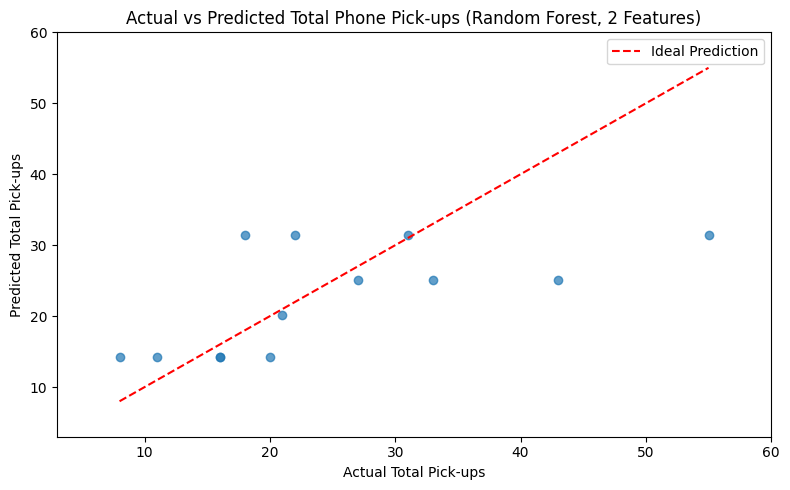

In [ ]:
import matplotlib.pyplot as plt

# Plot actual vs predicted values for Total Pick-ups
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.7)

# Ideal prediction line
plt.plot(
    [y_test.min(), y_test.max()],
    [y_test.min(), y_test.max()],
    'r--',
    label="Ideal Prediction"
)

# Limit axes for better scaling
plt.xlim(y_test.min() - 5, y_test.max() + 5)
plt.ylim(y_test.min() - 5, y_test.max() + 5)

# Labels and title
plt.xlabel("Actual Total Pick-ups")
plt.ylabel("Predicted Total Pick-ups")
plt.title("Actual vs Predicted Total Phone Pick-ups (Random Forest, 2 Features)")
plt.legend()
plt.tight_layout()
plt.show()

### 🔍 Model Accuracy Visualization
The scatter plot above compares the actual and predicted total phone pick-up values using a Random Forest model with only two features: LectureHours and IsHighCaffeineDay.

	•	The red dashed line represents the ideal case where predicted values exactly match the actual ones.
	•	While some points are close to this ideal line, many predictions are consistently overestimated — especially for lower actual values.
	•	This suggests that the model captures the general trend, but struggles to perfectly match real-world variability, likely due to untracked factors such as mood, stress, or context.

Overall, the model demonstrates a reasonable ability to follow the pattern of phone usage, even with a minimal feature set, but fine-grained prediction remains limited.

# **Conclusion**

This project set out to explore how my academic workload — particularly daily lecture hours — affects my phone pick-up behavior, especially for social media and communication apps. Over a 3-month period, I manually recorded daily data points, including contextual variables such as sleep duration, caffeine intake, gym attendance, and weather.

📊 Key Insights from Data Analysis:

	•	Hypothesis testing showed that higher lecture hours tend to increase total phone pick-ups, especially those related to social media and messaging.
	•	On exam days, pick-ups dropped significantly — suggesting increased focus or stress.
	•	Lifestyle factors such as sleep and caffeine had visual trends but weak statistical significance.
	•	Weather did not have a strong effect on phone behavior.

🧠 Feature Engineering and Modeling:

To improve model performance, I engineered a binary feature: IsHighCaffeineDay, marking days with caffeine intake above 300mg. This feature was not originally present in the dataset but helped capture subtle behavioral shifts tied to overconsumption.

I then applied multiple machine learning models (Random Forest, K-Nearest Neighbors, and Linear Regression) to predict TotalPickups, SocialMediaPickups, and CommunicationPickups.

After testing all combinations of features, I found that the simplest and most effective combination — LectureHours and IsHighCaffeineDay — yielded strong prediction performance:

	•	TotalPickups: R² ≈ 0.36
	•	SocialMediaPickups: R² ≈ 0.69
	•	CommunicationPickups: R² ≈ 0.46

This confirms that academic intensity and caffeine levels are significant predictors of my phone usage behavior.

💡 Personal Takeaways:

This project was more than a data science exercise — it was a journey into my own habits. I became more aware of how academic stress and lifestyle choices subtly influence my screen time and focus. The process also gave me practical experience in:

	•	Data cleaning and transformation,
	•	Feature engineering,
	•	Hypothesis testing,
	•	Model evaluation and selection.

In conclusion, I learned that even small datasets, when enriched and analyzed properly, can reveal powerful behavioral insights. Through minimal yet meaningful features, I was able to understand and quantify patterns in my digital life — and possibly take steps toward better focus and healthier phone habits.